# Handwritten Digit Classification
Mostafa Ebrahimi


<a id='Introduction'></a>
## <span style="color:orange">Introduction</span>
In this project, we will use the famous MNIST dataset to build a handwritten digit classifier. The dataset consists of 70,000 images, each 28 x 28 pixels grayscale image of handwritten digits (0-9). The goal is to build a model that can correctly identify the digit (0-9) written in an image.


<a id='Importing-Libraries'></a>
## <span style="color:orange">Importing Libraries & declaring constants</span>

In [90]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import colorama
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

NUM_CLASSES = 10
PIXEL_DEPTH = 255
Epochs = 20


def print_header(text):
    print(colorama.Style.BRIGHT + colorama.Fore.GREEN + text + colorama.Style.RESET_ALL)

## <span style="color:orange">Show Images</span>
as you see, the images are 28 x 28 pixels grayscale images of handwritten digits (0-9).

In [74]:
print_header("Shape of Dataset")
print(x_train.shape[1:], "\n")


print_header("Show content of a image")
print("Label: ", y_train[0]) 
print("Image: ")
print(x_train[0])


Shape of Dataset
(28, 28) 

Show content of a image
Label:  5
Image: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0

Show images of each class


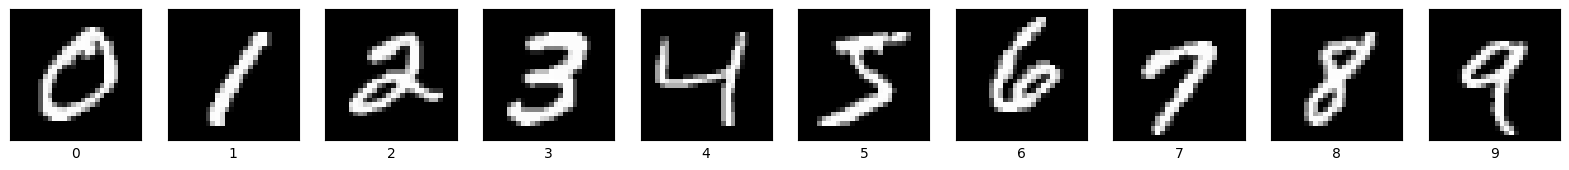

In [75]:
print_header("Show images of each class")
plt.figure(figsize=(20, 20))
for i in range(NUM_CLASSES):
    plt.subplot(1, NUM_CLASSES, i + 1)
    index_class = np.where(y_train == i)[0][0]
    img = x_train[index_class]
    plt.imshow(img, cmap='gray')
    plt.xlabel(str(i))
    plt.xticks([])
    plt.yticks([])

plt.show()

## <span style="color:orange">Count of test & train data</span>

In [76]:
print_header("Count of train data")
print(len(x_train), "\n")

print_header("Count of test data")
print(len(x_test))

Count of train data
60000 

Count of test data
10000


## <span style="color:orange">Number of images of each class</span>

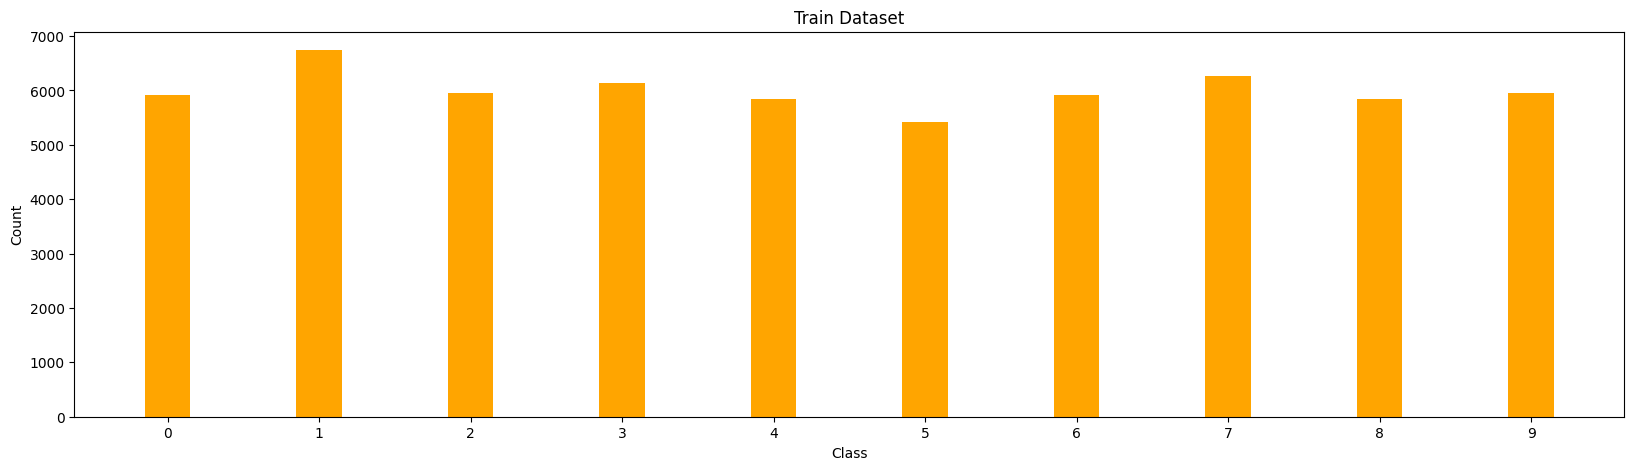

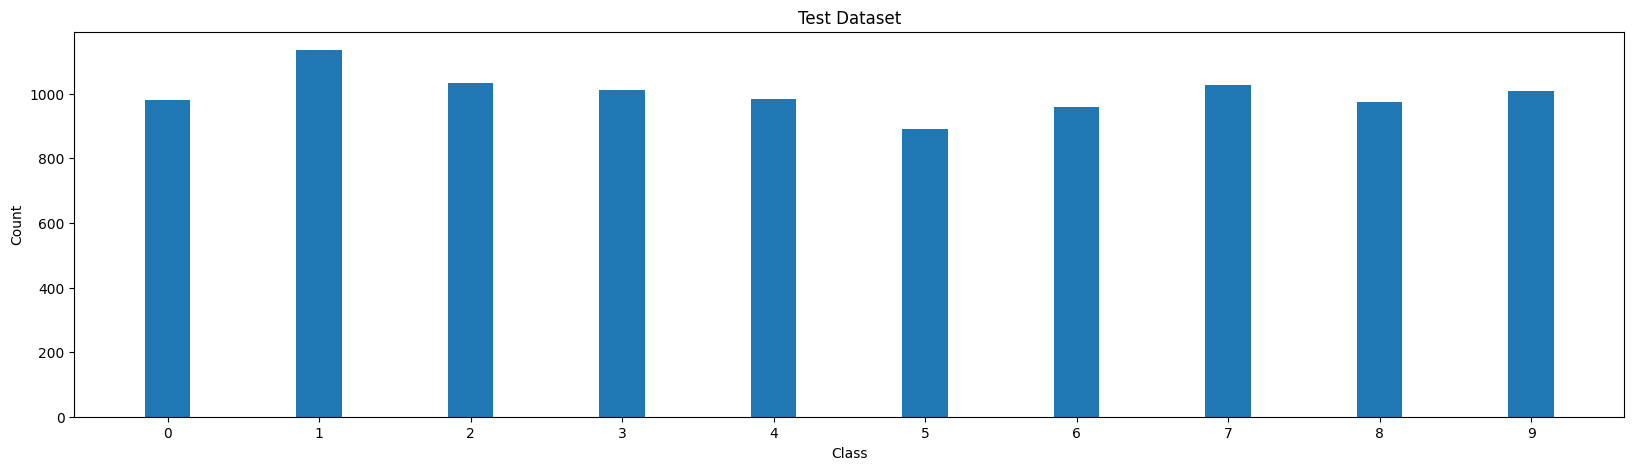

In [77]:
test_count_class = [np.sum(y_train == i) for i in range(NUM_CLASSES)]
plt.figure(figsize=(20, 5))
plt.title('Train Dataset')
plt.bar(range(NUM_CLASSES), test_count_class, width=0.3, color='orange')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(range(NUM_CLASSES))
plt.show()

test_count_class = [np.sum(y_test == i) for i in range(NUM_CLASSES)]
plt.figure(figsize=(20, 5))
plt.title('Test Dataset')
plt.bar(range(NUM_CLASSES), test_count_class, width=0.3)
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(range(NUM_CLASSES))
plt.show()

## <span style="color:orange">Normalization</span>

In [78]:
x_train = x_train / PIXEL_DEPTH
x_test = x_test / PIXEL_DEPTH

print_header("Show content of a image after normalization")
print("Label: ", y_train[0])
print("Image: ")
print(x_train[0])

Show content of a image after normalization
Label:  5
Image: 
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.  

## <span style="color:orange">Convert labels to one-hot vectors</span>

In [79]:
y_train_1_hot = tf.keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test_1_hot = tf.keras.utils.to_categorical(y_test, NUM_CLASSES)

print_header("Show a label after one-hot encoding")
print(y_train_1_hot[0])

Show a label after one-hot encoding
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## <span style="color:orange">Generate the model</span>

In [80]:
# Input layer : 28 x 28 = 784 n
# 2 hidden layer : 16 n, 16 n
# Output layer : 10 n

def get_model(x_train, y_train_1_hot, x_test, y_test_1_hot):
    # Define model
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    # Compile model
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    log = model.fit(x_train, y_train_1_hot, epochs = Epochs, batch_size = 32, validation_data=(x_test, y_test_1_hot))

    return model, log

In [81]:
model, log = get_model(x_train, y_train_1_hot, x_test, y_test_1_hot)

Epoch 1/20
1875/1875 [==============================] - 1s 554us/step - loss: 0.4590 - accuracy: 0.8693 - val_loss: 0.2629 - val_accuracy: 0.9252
Epoch 2/20
1875/1875 [==============================] - 1s 499us/step - loss: 0.2440 - accuracy: 0.9291 - val_loss: 0.2302 - val_accuracy: 0.9311
Epoch 3/20
1875/1875 [==============================] - 1s 495us/step - loss: 0.2097 - accuracy: 0.9384 - val_loss: 0.2119 - val_accuracy: 0.9369
Epoch 4/20
1875/1875 [==============================] - 1s 489us/step - loss: 0.1875 - accuracy: 0.9446 - val_loss: 0.1898 - val_accuracy: 0.9438
Epoch 5/20
1875/1875 [==============================] - 1s 503us/step - loss: 0.1734 - accuracy: 0.9488 - val_loss: 0.1799 - val_accuracy: 0.9446
Epoch 6/20
1875/1875 [==============================] - 1s 574us/step - loss: 0.1615 - accuracy: 0.9531 - val_loss: 0.1700 - val_accuracy: 0.9505
Epoch 7/20
1875/1875 [==============================] - 1s 569us/step - loss: 0.1537 - accuracy: 0.9540 - val_loss: 0.1685 -

## <span style="color:orange">Analyze the model</span>

In [82]:
def draw_loss_accuracy_model(log):
    plt.figure(figsize=(20, 3))
    plt.plot(log.history['loss'], label='Training Loss', color='blue')
    plt.plot(log.history['val_loss'], label='Validation Loss', color='red')
    plt.xticks(np.arange(0, Epochs, 1))
    plt.xlabel("Epochs")
    plt.legend()
    plt.show()

    plt.figure(figsize=(20, 3))
    plt.plot(log.history['accuracy'], label='Training Accuracy', color='blue')
    plt.plot(log.history['val_accuracy'], label='Validation Accuracy', color='red')
    plt.xticks(np.arange(0, Epochs, 1))
    plt.xlabel("Epochs")
    plt.legend()
    plt.show()

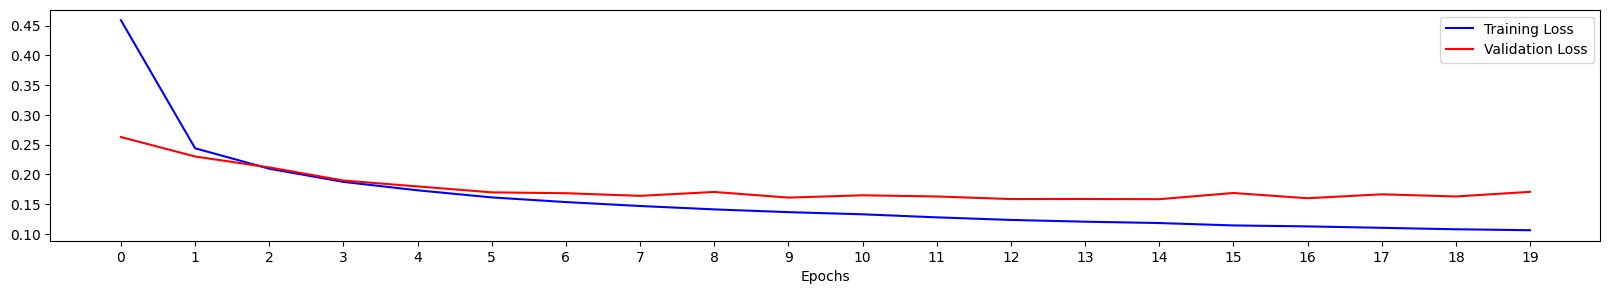

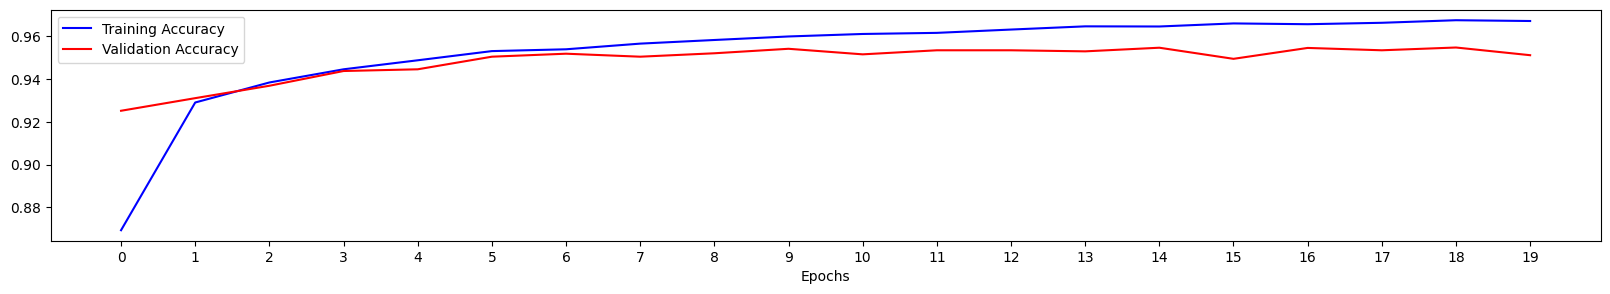

In [83]:
draw_loss_accuracy_model(log)

In [88]:
def evaluate_model_performance(model, x_data, y_data):
    y_pred = model.predict(x_data)
    y_pred_classes = np.argmax(y_pred, axis=1)

    print('\n')
    print(classification_report(y_data, y_pred_classes))
    return y_pred_classes

In [92]:
print(colorama.Style.BRIGHT + colorama.Fore.GREEN + 'Classification Report_Training Data)', colorama.Fore.RESET)
cnn_pred_class_train = evaluate_model_performance(model, x_train, y_train)

print('\n\n')

print(colorama.Style.BRIGHT + colorama.Fore.GREEN + 'Classification Report_Testing Data)', colorama.Fore.RESET)
cnn_pred_class_test = evaluate_model_performance(model, x_test, y_test)

Classification Report_Training Data) 
1875/1875 [==============================] - 1s 289us/step


              precision    recall  f1-score   support

           0       0.96      0.99      0.98      5923
           1       0.99      0.99      0.99      6742
           2       0.95      0.98      0.97      5958
           3       0.95      0.97      0.96      6131
           4       0.99      0.95      0.97      5842
           5       0.97      0.96      0.97      5421
           6       0.98      0.98      0.98      5918
           7       0.98      0.98      0.98      6265
           8       0.98      0.93      0.95      5851
           9       0.95      0.96      0.96      5949

    accuracy                           0.97     60000
   macro avg       0.97      0.97      0.97     60000
weighted avg       0.97      0.97      0.97     60000




Classification Report_Testing Data) 
313/313 [==============================] - 0s 287us/step


              precision    recall  f1-score